In [1]:
import pandas as pd 
import numpy as np 



In [6]:
p = pd.read_csv('../../discord_backup/tournaments/major12023/data/p.csv', sep = ';')
p

,Unnamed: 0,Nick,Against,K,A,D,Diff,K/d,Tournament,Season,...,Rounds_win_rate,drp,svr,kpr,impact,Rating 2.0,MVPM,Team,Maps,Maps won
0,10467.0,1nko,HRTG,16,3,20,-4,0.80,Minor x CyberStars,2,...,0.360000,0.800000,0.20,0.640000,43.800000,0.86,0,E8,1,0
1,9410.0,Apart,NOOBS,17,0,10,7,1.70,ANGRY.ORG,5,...,0.555556,0.555556,0.44,0.944444,69.444444,1.39,0,SN,1,1
2,9420.0,Apart,NOOBS,13,4,8,5,1.62,ANGRY.ORG,5,...,0.833333,0.666667,0.33,1.083333,75.833333,1.50,0,SN,1,1
3,9582.0,Apart,HRTG,13,3,8,5,1.62,ANGRY.ORG,5,...,0.625000,0.500000,0.50,0.812500,68.437500,1.37,0,SN,1,1
4,9591.0,Apart,HRTG,10,0,3,7,3.33,ANGRY.ORG,5,...,1.000000,0.300000,0.70,1.000000,85.000000,1.74,0,SN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,NaN,xZise,SN,5,1,11,-6,0.45,Major2023,1,...,0.090909,1.000000,0.00,0.454545,24.090909,0.46,0,HzN,1,0
3586,NaN,Lighting,SN,5,2,11,-6,0.45,Major2023,1,...,0.090909,1.000000,0.00,0.454545,25.454545,0.47,0,HzN,1,0
3587,NaN,invi,SN,5,4,11,-6,0.45,Major2023,1,...,0.090909,1.000000,0.00,0.454545,28.181818,0.51,0,HzN,1,0
3588,NaN,Nekr0,SN,6,3,11,-5,0.55,Major2023,1,...,0.090909,1.000000,0.00,0.545455,31.363636,0.58,0,HzN,1,0


In [8]:
tournament = 'Major2023'

In [41]:
def best_param_per_map(p, tournament, param, ascending = False):
    p1 = p.loc[p['Tournament'] == tournament, :].sort_values(param, ascending = ascending).reset_index(drop = True)[0:5]
    p1 = p1.loc[:, ['Team', 'Nick', 'K', 'A', 'D', 'K/d', 'svr', 'kpr', 'Rating 2.0', 'Map', 'Against', 'Date']]
    p1['svr'] = round(p1['svr'], 2)
    p1['kpr'] = round(p1['kpr'], 2)
    print('Лучший игрок на', tournament, 'по', param, 'за одну карту :', p1['Nick'][0], 'с', param, '=', p1[param][0])
    p1.rename(columns={'K/d': 'K/D', 'svr': 'SVR', 'kpr': 'KPR', 'Rating 2.0': 'Rating'}, inplace=True)
    
    #display(p1)
    

    

In [42]:
params = ['K', 'A', 'D', 'K/d', 'svr', 'kpr', 'Rating 2.0',]

for param in params:
    if param == 'D':
        best_param_per_map(p,tournament, param, ascending= True)
    else:     
        best_param_per_map(p,tournament, param)

Лучший игрок на Major2023 по K за одну карту : fRONZES с K = 24
Лучший игрок на Major2023 по A за одну карту : Nekr0 с A = 9
Лучший игрок на Major2023 по D за одну карту : Nekr0 с D = 1
Лучший игрок на Major2023 по K/d за одну карту : xZise с K/d = 10.0
Лучший игрок на Major2023 по svr за одну карту : Nekr0 с svr = 0.9
Лучший игрок на Major2023 по kpr за одну карту : reason с kpr = 9.5
Лучший игрок на Major2023 по Rating 2.0 за одну карту : Nekr0 с Rating 2.0 = 2.63


In [44]:
t = pd.read_csv('../../discord_backup/tournaments/major12023/data/t.csv', sep = ';')
t['c'] = 1
t

,Unnamed: 0,Data,Tournament,Season,Stage,Map,Team 1,Team 2,Winner score,Loser score,Points,c
0,939.0,07.01.2022,ANGRY.ORG,5,"""1/4""",Sandstone,MnS,rioth,10,6,0.0,1
1,941.0,07.01.2022,ANGRY.ORG,5,"""1/4""",Zone9,MnS,rioth,10,4,0.0,1
2,942.0,08.01.2022,ANGRY.ORG,5,"""1/4""",Sandstone,RGG,HvS,10,1,0.0,1
3,943.0,08.01.2022,ANGRY.ORG,5,"""1/4""",Sakura,RGG,HvS,10,9,0.0,1
4,944.0,08.01.2022,ANGRY.ORG,5,"""1/4""",Province,RGG,HvS,10,6,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,26.06.2023,Major2023,1,"""Final""",Province,HzN,SN,1,10,NaN,1
355,NaN,26.06.2023,Major2023,1,"""Final""",Rust,HzN,SN,0,10,NaN,1
356,NaN,26.06.2023,Major2023,1,"""Final""",Breeze,HzN,SN,10,5,NaN,1
357,NaN,26.06.2023,Major2023,1,"""Final""",Sakura,HzN,SN,10,9,NaN,1


In [73]:
sorted_df  = t[t['Tournament'] == tournament].groupby(['Map'])['c'].sum().sort_values(ascending= False)
sorted_df

Map
Breeze       13
Sakura       13
Province      8
Sandstone     8
Rust          4
Name: c, dtype: int64

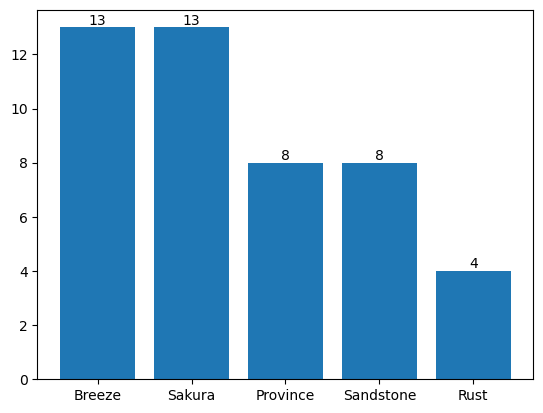

In [89]:
import matplotlib.pyplot as plt


def plot_df(s):
    fig, ax = plt.subplots()
    bars = ax.bar(range(len(s)), s.values)

    # Adding labels to each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    # Setting the x-axis tick labels as map names
    ax.set_xticks(range(len(s)))
    ax.set_xticklabels(s.index)


    # Display the plot
    plt.show()

plot_df(sorted_df)

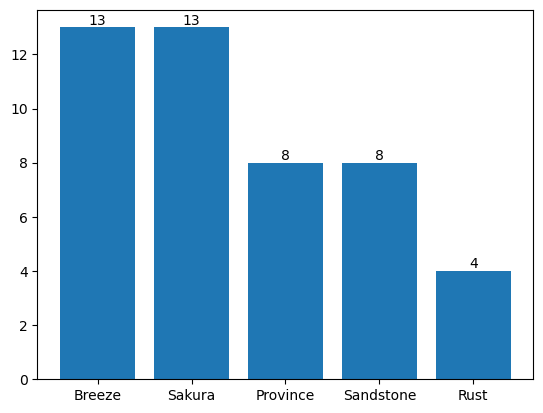

Map
Breeze       13
Sakura       13
Province      8
Sandstone     8
Rust          4
Name: c, dtype: int64

In [90]:
sorted_df = t[t['Tournament'] == tournament].groupby(['Map'])['c'].sum().sort_values(ascending= False)
plot_df(sorted_df)
sorted_df

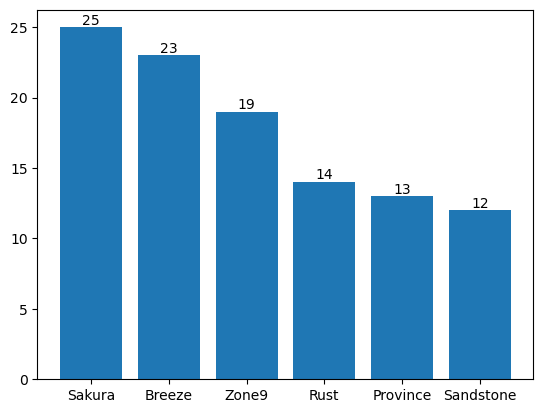

Map
Sakura       25
Breeze       23
Zone9        19
Rust         14
Province     13
Sandstone    12
Name: c, dtype: int64

In [92]:
sorted_df = t[t['Data'].str.split('.').str[2] == '2023'].groupby(['Map'])['c'].sum().sort_values(ascending= False)
plot_df(sorted_df)
sorted_df

In [60]:
t.groupby(['Map'])['c'].sum().sort_values(ascending= False)

Map
Zone9        83
Rust         72
Sandstone    66
Province     56
Sakura       52
Breeze       30
Name: c, dtype: int64